<a href="https://colab.research.google.com/github/ldsbalu/Balu-Portfolio/blob/main/CS677_Lab_1_Monte_Carlo_Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.1 (a) asks us to approximate the normalization constant for the standard normal distribution using Monte Carlo integration. The integral to compute is:
$$
I = \int_{-\infty}^{\infty} e^{-2x^2} \, dx
$$

using Monte Carlo integration with a uniform distribution
p(x)=Uniform(−a,a).
We choose a from the set  {0.01,0.02,0.05,0.1,0.5,1,2,3,5}.
For each a, we draw 1,000 samples and estimate the integral.
Plot the estimated values of I against a, with a horizontal line showing the analytical result 2π.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi

In [ ]:
def monte_carlo_integration(a, N=1000):
    x_samples = np.random.uniform(-a, a, N)
    f_x = np.exp(-x_samples**2 / 2)
    return (2 * a / N) * np.sum(f_x)

In [ ]:

# Exact normalization constant
exact_value, _ = spi.quad(lambda x: np.exp(-x**2 / 2), -np.inf, np.inf)

In [ ]:
# (a) Monte Carlo estimates for different 'a' values
a_values = [0.01, 0.02, 0.05, 0.1, 0.5, 1, 2, 3, 5]
estimates = [monte_carlo_integration(a) for a in a_values]

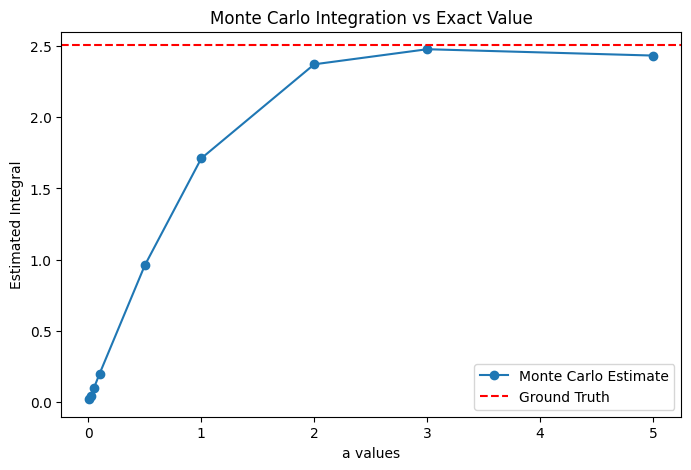

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(a_values, estimates, marker='o', linestyle='-', label='Monte Carlo Estimate')
plt.axhline(y=exact_value, color='r', linestyle='--', label='Ground Truth')
plt.xlabel('a values')
plt.ylabel('Estimated Integral')
plt.legend()
plt.title('Monte Carlo Integration vs Exact Value')
plt.show()

(b). set a = 4,
We choose a from the set:  $\{10, 100, 10^{3}, 10^{4}, 10^{5}\} $
Repeat the estimation 10 times for each sample size.

In [ ]:
a_fixed = 4
N_values = [10, 100, 1000, 10000, 100000]
means = []
std = []

for N in N_values:
    estimates = [monte_carlo_integration(a_fixed, N) for _ in range(10)]
    means.append(np.mean(estimates))
    std.append(np.std(estimates))

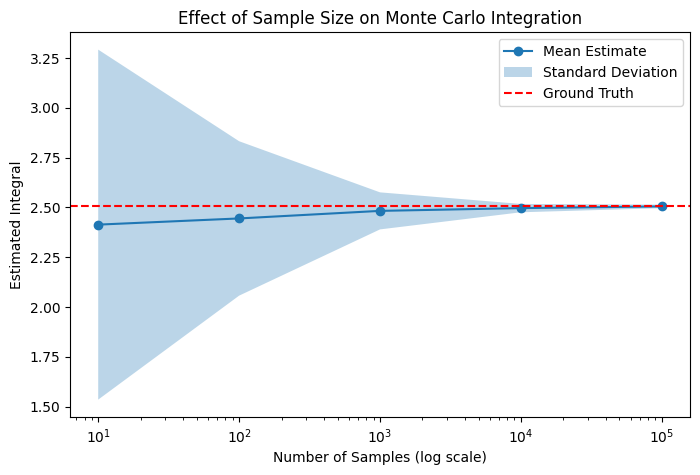

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(N_values, means, marker='o', linestyle='-', label='Mean Estimate')
plt.fill_between(N_values, np.array(means) - np.array(std), np.array(means) + np.array(std), alpha=0.3, label='Standard Deviation')
plt.axhline(y=exact_value, color='r', linestyle='--', label='Ground Truth')
plt.xscale('log')
plt.xlabel('Number of Samples (log scale)')
plt.ylabel('Estimated Integral')
plt.legend()
plt.title('Effect of Sample Size on Monte Carlo Integration')
plt.show()

(c). Compute the integral using scipy.integrate.quad.
Compare the quadrature result with the Monte Carlo estimates from a.
Use a similar plot as in a.

In [ ]:
a_values = np.linspace(0.01, 5, 20)
monte_carlo_estimates = [monte_carlo_integration(a) for a in a_values]
quad_estimates = [spi.quad(lambda x: np.exp(-x**2 / 2), -np.inf, np.inf)[0] for _ in a_values]

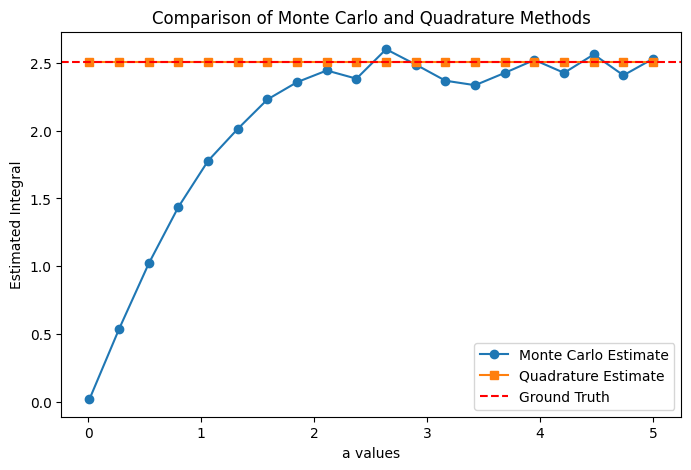

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(a_values, monte_carlo_estimates, marker='o', linestyle='-', label='Monte Carlo Estimate')
plt.plot(a_values, quad_estimates, marker='s', linestyle='-', label='Quadrature Estimate')
plt.axhline(y=exact_value, color='r', linestyle='--', label='Ground Truth')
plt.xlabel('a values')
plt.ylabel('Estimated Integral')
plt.legend()
plt.title('Comparison of Monte Carlo and Quadrature Methods')
plt.show()

1.2 a.
**CDF:**  
$F(x) = \frac{1}{\pi}\arctan(x) + \frac{1}{2}$

**Inverse CDF:**  
$F^{-1}(u) = \tan\left(\pi(u - 0.5)\right)$

**Truncated Uniform:**  
$u \in [0.05, 0.95] \implies x \in [\tan(-0.45\pi), \tan(0.45\pi)]$




In [ ]:
import seaborn as sns
import torch

In [ ]:
def inverse_cauchy_sampling(N=10000):
    u = np.random.uniform(0.05, 0.95, N)
    samples = np.tan(np.pi * (u - 0.5))
    return samples
samples = inverse_cauchy_sampling()

In [ ]:
x_vals = np.linspace(-10, 10, 1000)
cauchy_pdf = 1 / (np.pi * (1 + x_vals**2))

b. Generate uniform samples
Generate uninform samples: [0.05,0.95].
Apply the inverse CDF function to obtain Cauchy-distributed samples.
Plot KDE using Seaborn and compare it with the true Cauchy PDF.

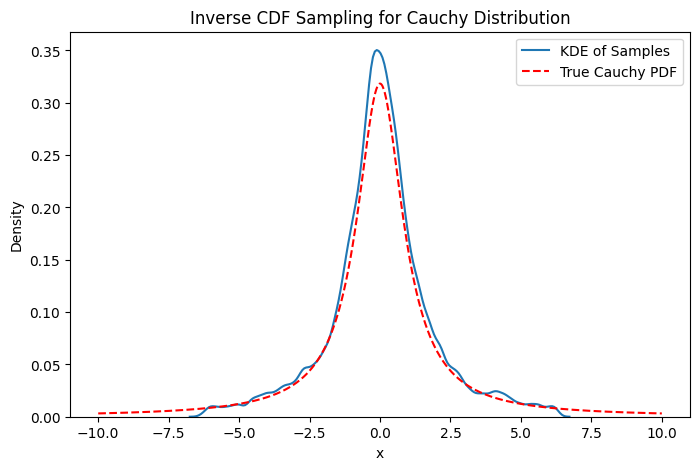

In [ ]:
plt.figure(figsize=(8, 5))
sns.kdeplot(samples, label='KDE of Samples', bw_adjust=0.5)
plt.plot(x_vals, cauchy_pdf, label='True Cauchy PDF', linestyle='--', color='r')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.title('Inverse CDF Sampling for Cauchy Distribution')
plt.show()

c. Sampling with PyTorch’s Built-in Inverse CDF

In [ ]:
dist = torch.distributions.Cauchy(loc=0, scale=1)
u_torch = torch.tensor(np.random.uniform(0.05, 0.95, 10000))
torch_samples = dist.icdf(u_torch).numpy()


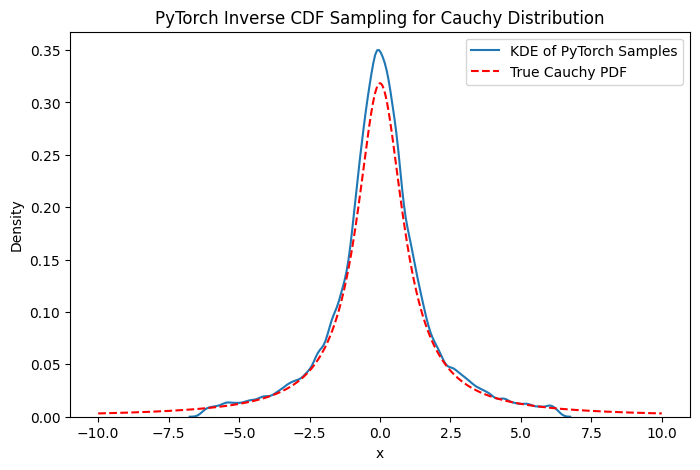

In [ ]:
plt.figure(figsize=(8, 5))
sns.kdeplot(torch_samples, label='KDE of PyTorch Samples', bw_adjust=0.5)
plt.plot(x_vals, cauchy_pdf, label='True Cauchy PDF', linestyle='--', color='r')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.title('PyTorch Inverse CDF Sampling for Cauchy Distribution')
plt.show()

1.3 a.
We need to:

Define the target probability density function (PDF):
p(x)=0.5⋅Normal(0,1.5)+0.7⋅Cauchy(5,3)
Define proposal distributions and their density functions:
Normal(5,5)
Uniform(-15,15)
Laplace(5,5)
Choose an appropriate scaling factor M.
Compute acceptance ratios.

In [ ]:
import torch.distributions as D

In [ ]:
def target_pdf(x):
    gaussian_pdf = D.Normal(0, 1.5).log_prob(x).exp()
    cauchy_pdf = D.Cauchy(5, 3).log_prob(x).exp()
    return 0.5 * gaussian_pdf + 0.7 * cauchy_pdf

In [ ]:

def rejection_sampling(proposal_dist, proposal_pdf, M, N=10000):
    samples = proposal_dist.sample((N,))
    accept_prob = target_pdf(samples) / (M * proposal_pdf(samples))
    accepted_samples = samples[torch.rand(N) < accept_prob]
    return accepted_samples.numpy(), len(accepted_samples) / N

In [ ]:
normal_proposal = D.Normal(5, 5)
uniform_proposal = D.Uniform(-15, 15)
laplace_proposal = D.Laplace(5, 5)

In [ ]:
def normal_pdf(x): return torch.exp(normal_proposal.log_prob(x))
def uniform_pdf(x): return torch.exp(uniform_proposal.log_prob(x))
def laplace_pdf(x): return torch.exp(laplace_proposal.log_prob(x))

In [ ]:
M_values = {"Normal(5,5)": 2.5, "Uniform(-15,15)": 0.05, "Laplace(5,5)": 2.0}

results = {}
for name, M in M_values.items():
    proposal_dist = eval(f"{name.split('(')[0].lower()}_proposal")
    proposal_pdf = eval(f"{name.split('(')[0].lower()}_pdf")
    samples, acceptance_ratio = rejection_sampling(proposal_dist, proposal_pdf, M)
    results[name] = (samples, acceptance_ratio)
    print(f"{name} Acceptance Ratio: {acceptance_ratio:.4f}")

Normal(5,5) Acceptance Ratio: 0.4187
Uniform(-15,15) Acceptance Ratio: 1.0000
Laplace(5,5) Acceptance Ratio: 0.4905


In [ ]:
x_vals = np.linspace(-15, 15, 1000)
target_vals = target_pdf(torch.tensor(x_vals)).numpy()

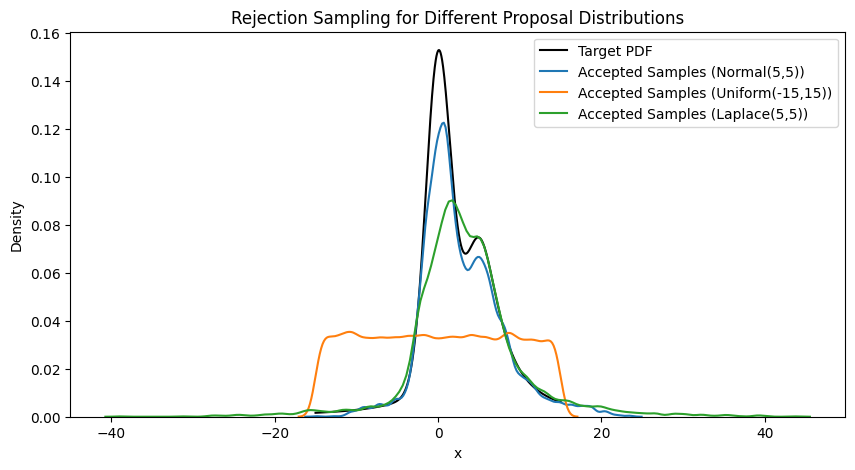

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(x_vals, target_vals, label='Target PDF', color='black')

for name, (samples, _) in results.items():
    sns.kdeplot(samples, label=f'Accepted Samples ({name})', bw_adjust=0.5)

plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.title('Rejection Sampling for Different Proposal Distributions')
plt.show()